In [1]:
from keras.utils import image_dataset_from_directory
import os

base_dir = os.path.expanduser("~/Desktop")

train_dir1 = os.path.join(base_dir, 'train1')
train_dir2 = os.path.join(base_dir, 'train2')
train_dir3 = os.path.join(base_dir, 'train3')
train_dir4 = os.path.join(base_dir, 'train5')
validation_dir = os.path.join(base_dir, 'train4')
test_dir = os.path.join(base_dir, 'test')

IMG_SIZE = 32
BATCH_SIZE = 128
train_dataset1 = image_dataset_from_directory(train_dir1, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
train_dataset2 = image_dataset_from_directory(train_dir2, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
train_dataset3 = image_dataset_from_directory(train_dir3, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
train_dataset4 = image_dataset_from_directory(train_dir4, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
validation_dataset = image_dataset_from_directory(validation_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
test_dataset = image_dataset_from_directory(test_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [2]:
train_dataset = train_dataset1.concatenate(train_dataset2)
#train_dataset = train_dataset1.concatenate(train_dataset2).concatenate(train_dataset3).concatenate(train_dataset4)

In [9]:
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from keras import layers

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)) 

# feature extraction
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Classification
x = layers.Flatten()(x)
x = Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,734,304 (101.98 MB)

 Trainable params: 8,911,434 (33.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,822,870 (67.99 MB)

In [12]:
import tensorflow as tf

#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

ValueError: Could not interpret optimizer identifier: adams

In [11]:
history = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 77s 473ms/step - accuracy: 0.1169 - loss: 2.2777 - val_accuracy: 0.2384 - val_loss: 2.0281
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 66s 420ms/step - accuracy: 0.2341 - loss: 2.0331 - val_accuracy: 0.2455 - val_loss: 2.0460
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 68s 429ms/step - accuracy: 0.3006 - loss: 1.8785 - val_accuracy: 0.3381 - val_loss: 1.8409
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 67s 421ms/step - accuracy: 0.3377 - loss: 1.7902 - val_accuracy: 0.3501 - val_loss: 1.7608
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 70s 444ms/step - accuracy: 0.3595 - loss: 1.7184 - val_accuracy: 0.3540 - val_loss: 1.7334
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 72s 455ms/step - accuracy: 0.3829 - loss: 1.6650 - val_accuracy: 0.3844 - val_loss: 1.7074
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - accuracy: 0.4103 - loss: 1.6030 - val_accuracy: 0.3947 - val_loss: 1.6156
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 67s 423ms/step - accuracy: 0.4333 - loss: 1

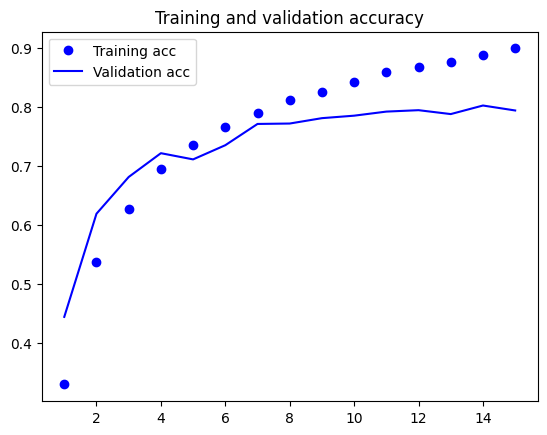

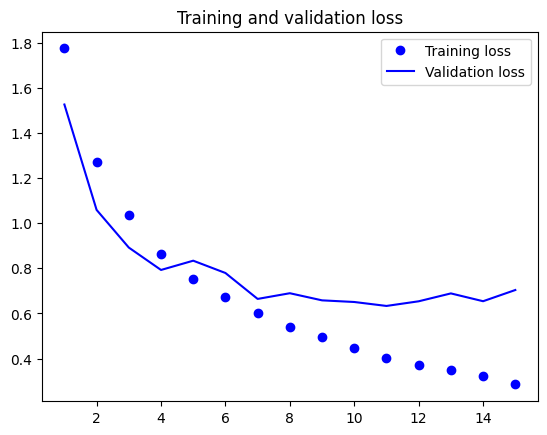

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)
print(test_acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - accuracy: 0.7994 - loss: 0.6754
0.8022000193595886


In [36]:
model.save('Modelo_S_32.h5')